<a href="https://colab.research.google.com/github/imsruthi/Python/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [51]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import os

In [ ]:
os.listdir()

['.config',
 'test 11.28.48 AM.csv',
 'gender_submission 11.28.48 AM.csv',
 'logs.log',
 'train 11.28.48 AM.csv',
 'sample_data']

In [43]:
pwd=os.getcwd()
pwd

'/content'

In [45]:
test_filepath=os.path.join(pwd,"test.csv")
train_filepath=os.path.join(pwd,"train.csv")
gender_filepath=os.path.join(pwd,"gender_submmision.csv")


In [48]:
test_import=pd.read_csv(test_filepath)
train_import=pd.read_csv(train_filepath)
gender_import=pd.read_csv(gender_filepath)

In [49]:
train_import

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
elf1 = setup(data=train_import,
             target='Survived',
             numeric_imputation='mean',
             categorical_imputation='mode',
             ignore_features=['Name','Ticket','Cabin'])

,Description,Value
0,Session id,3136
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,2


In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8139,0.0000,0.6949,0.7962,0.7402,0.5967,0.6016,0.3100
gbc,Gradient Boosting Classifier,0.8076,0.0000,0.6866,0.7888,0.7326,0.5836,0.5884,0.2470
et,Extra Trees Classifier,0.8075,0.0000,0.6866,0.7930,0.7333,0.5841,0.5903,0.2620
lightgbm,Light Gradient Boosting Machine,0.8044,0.0000,0.6947,0.7777,0.7324,0.5791,0.5829,0.3570
xgboost,Extreme Gradient Boosting,0.7916,0.0000,0.6777,0.7598,0.7152,0.5515,0.5550,0.2300
ridge,Ridge Classifier,0.7834,0.0000,0.6777,0.7378,0.7042,0.5344,0.5374,0.1100
lda,Linear Discriminant Analysis,0.7834,0.0000,0.6777,0.7378,0.7042,0.5344,0.5374,0.1070
lr,Logistic Regression,0.7819,0.0000,0.6609,0.7456,0.6980,0.5287,0.5332,0.9820
nb,Naive Bayes,0.7802,0.0000,0.6864,0.7310,0.7067,0.5313,0.5334,0.1100
ada,Ada Boost Classifier,0.7739,0.0000,0.6736,0.7263,0.6944,0.5161,0.5208,0.2590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=3136, verbose=0,
                       warm_start=False)

In [59]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.0000,0.6667,0.6667,0.6667,0.4615,0.4615
1,0.8095,0.0000,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.6984,0.0000,0.5833,0.6087,0.5957,0.3554,0.3556
3,0.8065,0.0000,0.7391,0.7391,0.7391,0.5853,0.5853
4,0.8065,0.0000,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.9032,0.0000,0.8333,0.9091,0.8696,0.7929,0.7948
6,0.8226,0.0000,0.7083,0.8095,0.7556,0.6173,0.6207
7,0.7903,0.0000,0.6667,0.7619,0.7111,0.5477,0.5507
8,0.9032,0.0000,0.7500,1.0000,0.8571,0.7862,0.8048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.0000,0.6250,0.7895,0.6977,0.5442,0.5528
1,0.7937,0.0000,0.5417,0.8667,0.6667,0.5285,0.5591
2,0.7460,0.0000,0.5000,0.7500,0.6000,0.4247,0.4434
3,0.8387,0.0000,0.6522,0.8824,0.7500,0.6349,0.6507
4,0.8548,0.0000,0.7500,0.8571,0.8000,0.6869,0.6906
5,0.9194,0.0000,0.7917,1.0000,0.8837,0.8233,0.8364
6,0.8065,0.0000,0.5833,0.8750,0.7000,0.5654,0.5908
7,0.7581,0.0000,0.4167,0.9091,0.5714,0.4336,0.4977
8,0.8710,0.0000,0.6667,1.0000,0.8000,0.7103,0.7421


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


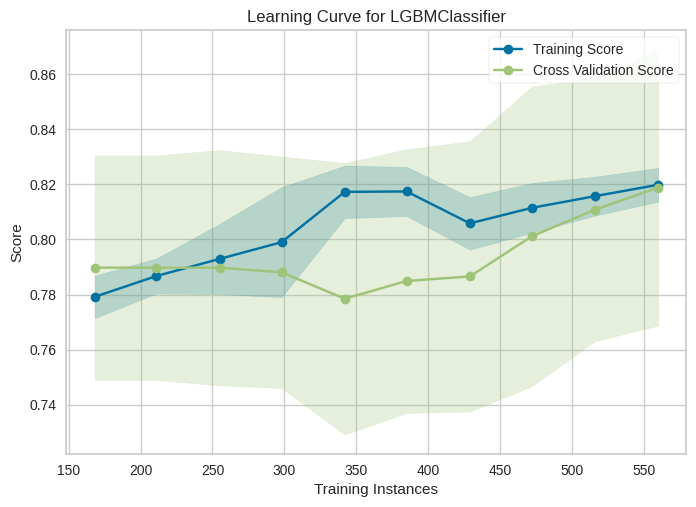

In [61]:
plot_model(estimator=tuned_lgbm,plot='learning')

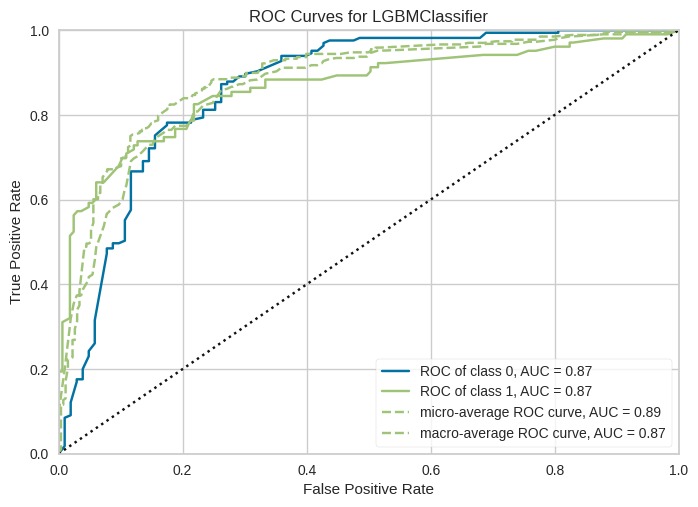

In [62]:
plot_model(estimator=tuned_lgbm,plot='auc')

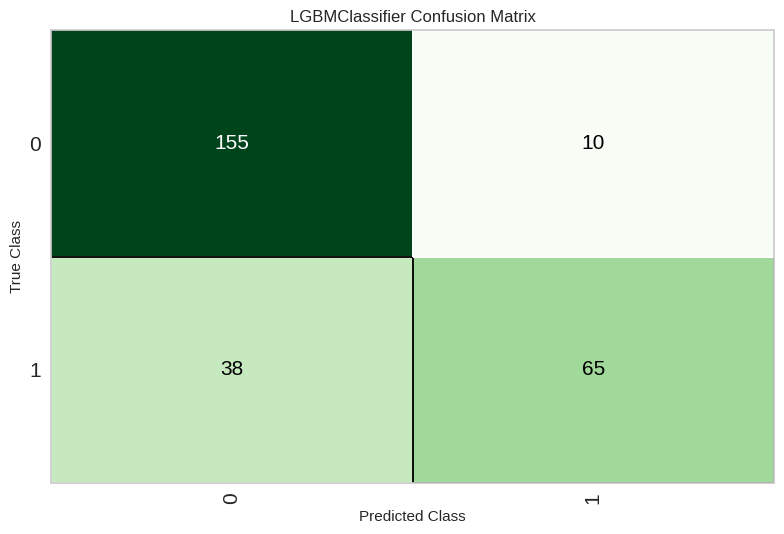

In [63]:
plot_model(estimator=tuned_lgbm,plot='confusion_matrix')

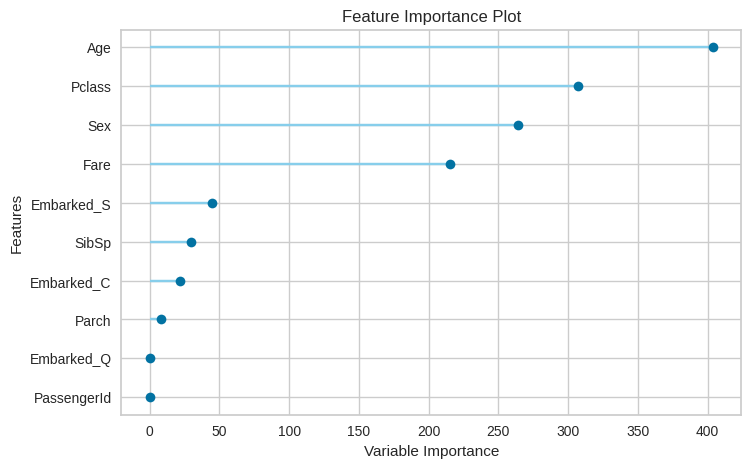

In [64]:
plot_model(estimator=tuned_lgbm,plot='feature')

In [65]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…